In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [8]:
single_image = x_train[0]

In [9]:
single_image.shape

(28, 28)

In [10]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

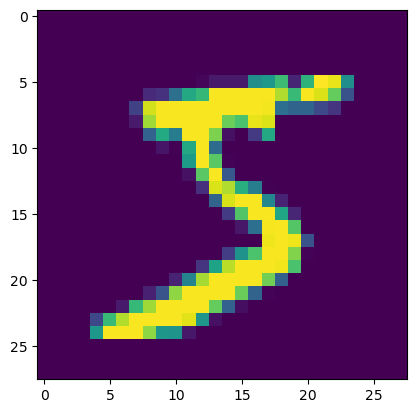

In [11]:
plt.imshow(single_image)

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(60000,)

In [17]:
y_example = to_categorical(y_train)

In [19]:
y_example.shape

(60000, 10)

In [20]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

In [22]:
y_cat_train = to_categorical(y_train,10)

In [23]:
x_train = x_train/255

In [24]:
x_test = x_test/255

In [25]:
# batch_size,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)

In [26]:
x_test = x_test.reshape(10000,28,28,1)

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [30]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), 
                    input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
                metrics = ['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-13 00:26:07.592413: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-13 00:26:07.592637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [33]:
model.fit(x_train,y_cat_train,epochs = 10, validation_data = (x_test,y_cat_test),
            callbacks = [early_stop])

Epoch 1/10


2022-11-13 00:33:23.828608: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-13 00:33:24.065891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1871/1875 [============================>.] - ETA: 0s - loss: 0.1456 - accuracy: 0.9565

2022-11-13 00:33:42.882901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 21s 10ms/step - loss: 0.1454 - accuracy: 0.9566 - val_loss: 0.0634 - val_accuracy: 0.9800
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0488 - accuracy: 0.9852 - val_loss: 0.0433 - val_accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0317 - accuracy: 0.9902 - val_loss: 0.0474 - val_accuracy: 0.9850


In [34]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot: >

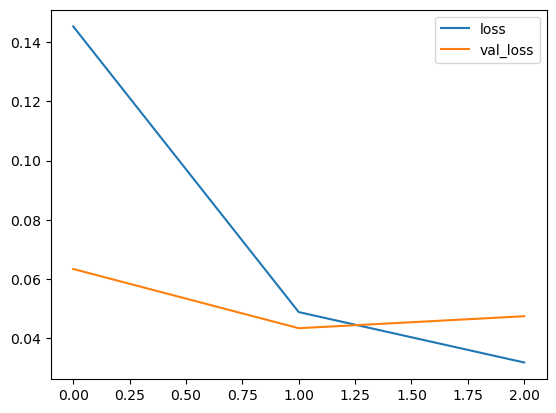

In [36]:
metrics[['loss','val_loss']].plot()

<AxesSubplot: >

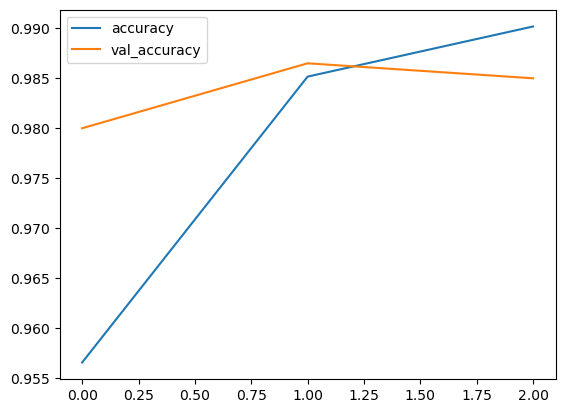

In [37]:
metrics[['accuracy','val_accuracy']].plot()

In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
model.evaluate(x_test,y_cat_test,verbose = 0)

[0.0473751462996006, 0.9850000739097595]

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
predictions =model.predict(x_test) 
classes=np.argmax(predictions,axis=1)

 55/313 [====>.........................] - ETA: 0s

2022-11-13 00:44:52.999107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


In [46]:
y_cat_test.shape

(10000, 10)

In [47]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [49]:
print(classification_report(y_test,classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       1.00      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



In [51]:
confusion_matrix(y_test, classes)

array([[ 977,    0,    1,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1132,    3,    0,    0,    0,    0,    0,    0,    0],
       [   1,    3, 1021,    0,    0,    0,    0,    7,    0,    0],
       [   0,    0,    2, 1004,    0,    1,    0,    2,    1,    0],
       [   1,    0,    0,    0,  975,    0,    0,    1,    0,    5],
       [   1,    0,    0,   21,    0,  861,    1,    0,    7,    1],
       [   6,    7,    0,    0,    3,    1,  939,    0,    2,    0],
       [   1,    2,    3,    0,    0,    0,    0, 1022,    0,    0],
       [   9,    2,    6,    1,    3,    0,    0,    5,  944,    4],
       [   5,    3,    0,    1,    9,    0,    0,   15,    1,  975]])

In [54]:
import seaborn as sns

<AxesSubplot: >

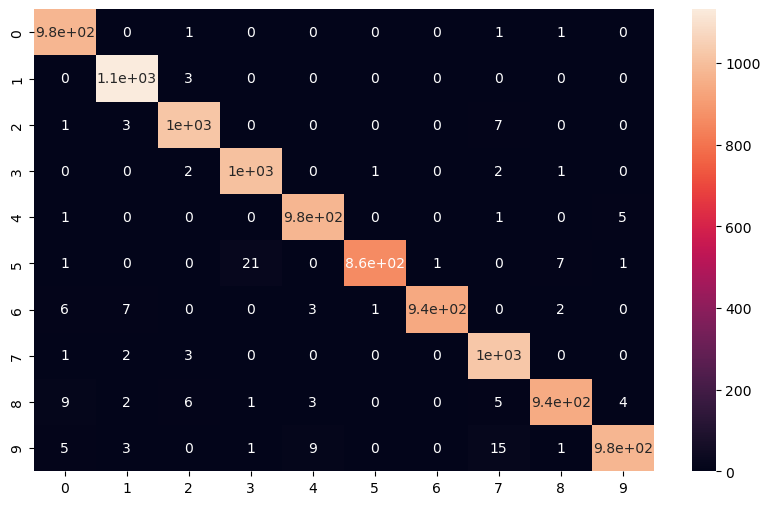

In [55]:
plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, classes),annot=True)

In [56]:
my_number = x_test[0]

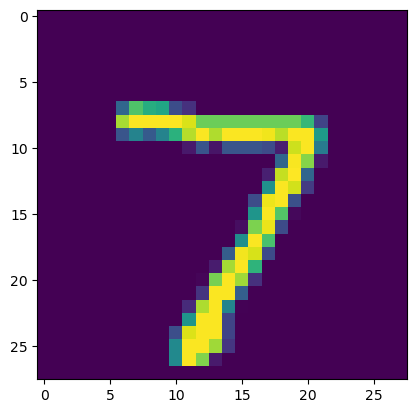

In [57]:
plt.imshow(my_number.reshape(28,28))

1/1 [==============================] - 0s 367ms/step


In [61]:
classes

array([7])